In [7]:
from functools import partial
from shapely.geometry import Point, Polygon
from shapely.ops import transform
import pandas as pd
import geopandas as gpd
import glob, pygeos, pyproj, utm, time

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'
gpd.options.use_pygeos = True

In [9]:
def main():
    
    # Reads tracts data
    df = pd.read_csv("../data/censo_dados_resumidos.csv", dtype={'Cod_setor': str})
    
    # Reads tracts shapefiles
    gdf = gpd.read_file("../data/setores_censitarios_shp_reduzido/")
    
    # Merges both
    gdf = gdf.merge(df, left_on='CD_GEOCODI', right_on='Cod_setor', how='left')
    
    return gdf


In [10]:
%%time
gdf = main()

CPU times: user 18 s, sys: 535 ms, total: 18.5 s
Wall time: 18.5 s


In [33]:
def grab_by_radius_proportional(input_point, all_tracts, target):
        
    total_people = 0
    radius = 0
        
    # While we don't meet the target population, keep increasing
    # the radius with each iteration
    while total_people < target:
                
        total_people = 0
        
        if radius != 0:
                        
            polygon = input_point.buffer(radius)
            
        else:
            polygon = input_point
                                    
                
        # Uses an r-tree to pre-select tracts
        # https://geoffboeing.com/2016/10/r-tree-spatial-index-python/
        # https://pygeos.readthedocs.io/en/latest/strtree.html
        
#         rtree = all_tracts.sindex
#         possible_matches_index = list(rtree.intersection(polygon.bounds))    
#         possible_matches = all_tracts.iloc[possible_matches_index]
                
        # Transforma em polígono para computar a interseção mais rápido usando os spatial index do geopandas
        selected_tracts = all_tracts [ all_tracts.geometry.intersects(polygon) ]
        
        print(f"Tracts intersecting: {selected_tracts.shape}")
        
        
        ax = all_tracts.plot()
        gpd.GeoSeries(polygon).plot(ax=ax)
               
        def grab_pop(population, tract, polygon):
                        
            intersection = tract.intersection(polygon)
            
            intersection_percentage = intersection.area / tract.area 
    
            pop_to_add = population * intersection_percentage
        
            return pop_to_add
        

        # Aplica a função acima de forma vetorizado, usando npArrays (df.col.values)
        selected_tracts['pop_to_add'] = grab_pop(selected_tracts.populacao_residente_domicilios_permanentes.values,
                                                 selected_tracts.geometry.values,
                                                 polygon)
        

        total_people = round(selected_tracts.pop_to_add.sum())
    
                
        
        if radius == 0:
            radius = .001
            
        else:
            radius = radius + (radius * .5)
        
        print(f"Polygon bounds: {polygon.bounds}")
        print(f"Total people: {total_people}")

            
 

In [34]:
sp = gdf [ gdf.CD_GEOCODM == "3550308"]

In [35]:
sp.geometry = sp.geometry.buffer(0)

Tracts intersecting: (0, 8)
Polygon bounds: (-23.5318, -46.6598, -23.5318, -46.6598)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.5328, -46.660799999999995, -23.5308, -46.6588)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.5333, -46.6613, -23.5303, -46.6583)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.53405, -46.662049999999994, -23.52955, -46.65755)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.535175, -46.663174999999995, -23.528425000000002, -46.656425)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.5368625, -46.6648625, -23.5267375, -46.654737499999996)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.539393750000002, -46.667393749999995, -23.52420625, -46.65220625)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.543190625, -46.671190624999994, -23.520409375, -46.648409375)
Total people: 0.0
Tracts intersecting: (0, 8)
Polygon bounds: (-23.

/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-25.7486378200531, -48.8766378200531, -21.3149621799469, -44.442962179946896)
Total people: 0.0
Tracts intersecting: (0, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-26.857056730079652, -49.98505673007965, -20.20654326992035, -43.334543269920346)
Total people: 0.0
Tracts intersecting: (0, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-28.519685095119478, -51.64768509511947, -18.543914904880523, -41.67191490488052)
Total people: 0.0
Tracts intersecting: (0, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-31.013627642679214, -54.14162764267921, -16.049972357320787, -39.17797235732078)
Total people: 0.0
Tracts intersecting: (0, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-34.75454146401882, -57.882541464018814, -12.309058535981181, -35.43705853598118)
Total people: 0.0
Tracts intersecting: (0, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-40.36591219602823, -63.493912196028226, -6.697687803971771, -29.825687803971768)
Total people: 0.0
Tracts intersecting: (0, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-48.78296829404235, -71.91096829404233, 1.7193682940423436, -21.408631705957653)
Total people: 0.0
Tracts intersecting: (18953, 8)


/home/rodrigo/anaconda3/envs/geopandas-dev/lib/python3.8/site-packages/geopandas/plotting.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Polygon bounds: (-61.40855244106352, -84.53655244106352, 14.344952441063516, -8.783047558936481)
Total people: 11209673.0
CPU times: user 3min 9s, sys: 1.88 s, total: 3min 11s
Wall time: 2min 3s


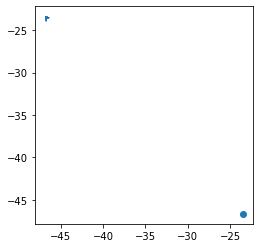

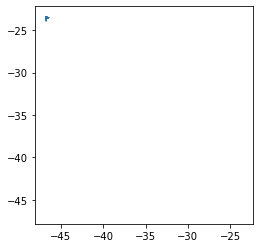

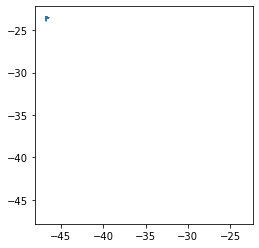

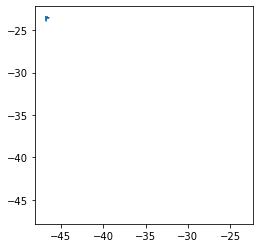

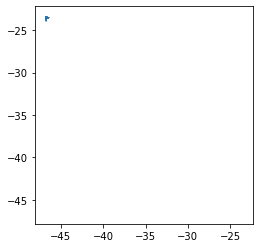

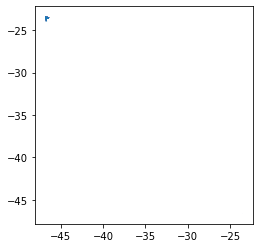

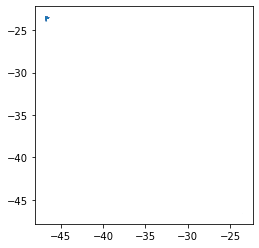

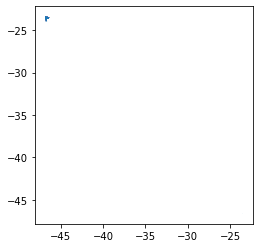

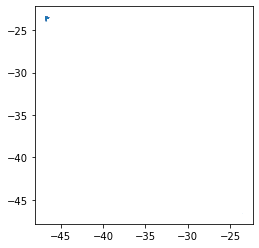

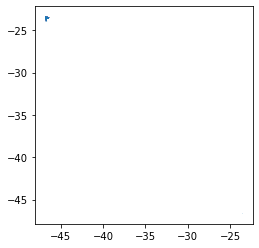

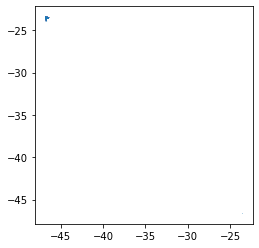

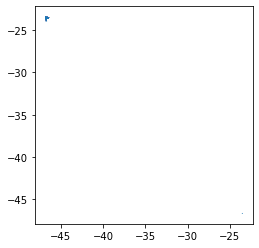

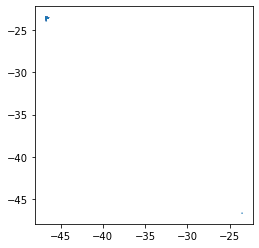

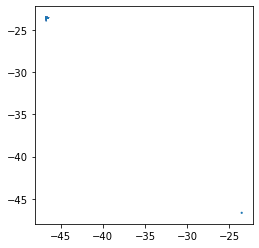

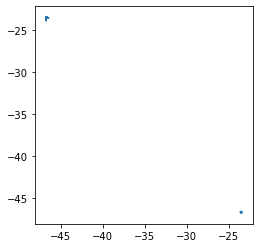

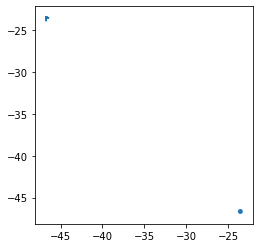

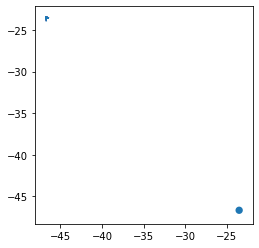

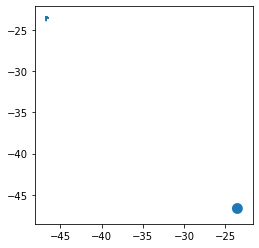

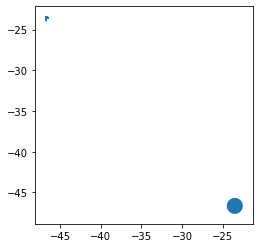

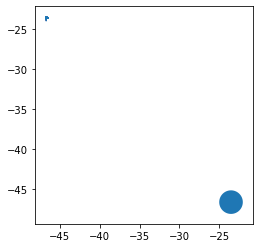

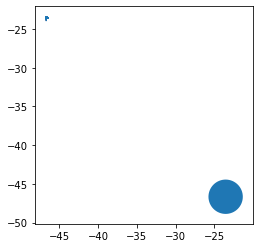

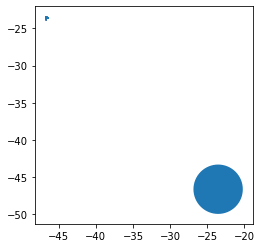

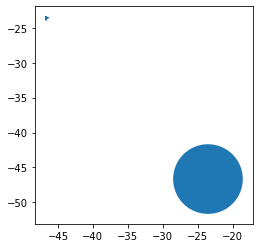

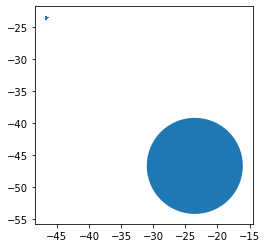

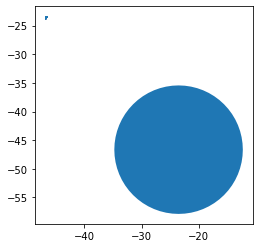

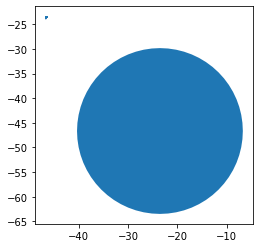

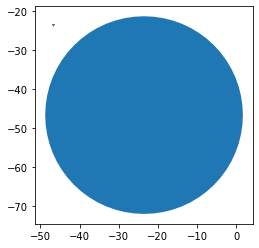

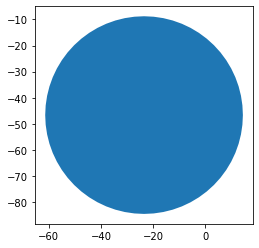

In [36]:
%%time
# Point(-23.5318,-46.6598)
grab_by_radius_proportional(Point(-23.5318,-46.6598), 
                            sp, 
                            target = 40000)

In [ ]:
   # Uma vez que tenha passado, verificamos se está na margem de tolerância.
    # Se não estiver, faz ajuste fino
    fine_tune = .5
    
    while not (total_people < target * 1.05 and total_people > target * .95):
        
        
        # Se estiver acima de 105% do alvo, decresce raio na proporção do fine_tune
        if total_people > target * 1.05:
            
            total_people = 0
            
            radius = radius - radius * fine_tune
                        
            polygon = input_point.point.buffer(radius)
                        
            # Pre-seleciona os polígonos passíveis de interseção
            # https://geoffboeing.com/2016/10/r-tree-spatial-index-python/

            checkpoint = time.time()

            possible_matches_index = list(spatial_index.intersection(polygon.bounds))
            possible_matches = all_tracts.iloc[possible_matches_index]
            
            selected_tracts = possible_matches [ possible_matches.geometry.intersects(polygon) ]
            
#             print(f"Intersection time: {round(time.time() - checkpoint, 4)}")

            checkpoint = time.time()
        
            selected_tracts['pop_to_add'] = grab_pop(selected_tracts.populacao_residente_domicilios_permanentes.values,
                                                 selected_tracts.geometry.values,
                                                 polygon)

            total_people = round(selected_tracts.pop_to_add.sum())

#             print(f"Vector time: {round(time.time() - checkpoint, 4)}")

        
        # Se estiver abaixo, acresce na proporção do fine_tune
        elif total_people < target * .95:
        
            total_people = 0
        
            radius = radius *  (1 + fine_tune)
                        
            polygon = input_point.point.buffer(radius)
                        
            checkpoint = time.time()    
                
            # Pre-seleciona os polígonos passíveis de interseção
            # https://geoffboeing.com/2016/10/r-tree-spatial-index-python/
            possible_matches_index = list(spatial_index.intersection(polygon.bounds))
            possible_matches = all_tracts.iloc[possible_matches_index]
            
            selected_tracts = possible_matches [ possible_matches.geometry.intersects(polygon) ]
            
#             print(f"Intersection time: {round(time.time() - checkpoint, 4)}")
      
            checkpoint = time.time()
        
            selected_tracts['pop_to_add'] = grab_pop(selected_tracts.populacao_residente_domicilios_permanentes.values,
                                                 selected_tracts.geometry.values,
                                                 polygon)
    
            total_people = round(selected_tracts.pop_to_add.sum())

#             print(f"Vector time: {round(time.time() - checkpoint, 4)}")

                
        #print(f"Total people: {total_people}")
        #print()
        
        # Ajusta a fração
        fine_tune = fine_tune / 2
        
            
#     print(f"Total people: {total_people}")
    return polygon

In [ ]:
def grab_by_radius_proportional(input_point, all_tracts, rtree, target):

    
    
    total_people = 0
    radius = 0

In [ ]:
def rtree_query(tree, overlay):
    
    return tree.query(overlay).tolist()

In [ ]:
len(arr)